# Advanced Deep Learning with Keras
This course shows you how to solve a variety of problems using the versatile Keras functional API. You will start with simple, multi-layer dense networks (also known as multi-layer perceptrons), and continue on to more complicated architectures. The course will cover how to build models with multiple inputs and a single output, as well as how to share weights between layers in a model. We will also cover advanced topics such as category embeddings and multiple-output networks. If you've ever wanted to train a network that does both classification and regression, then this course is for you!

**Instructor:** Zachary Deane-Mayer, VP, Data Science at DataRobot

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (8, 8)

## $\star$ Chapter 1: The Keras Functional API
n this chapter, you'll become familiar with the basics of the Keras functional API. You'll build a simple functional network using functional building blocks, fit it to data, and make predictions.

### Keras input and dense layers
* Learn how to build complex models using Keras Functional API, including using advanced topics such as **shared layers**, **categorical embeddings**, **multiple inputs**, and **multiple outputs**.
* The **Keras Functional API** is extremely simple, yet immensely powerful.
* By the end of this course, **you will build a model capable of solving a regression and a classification problem at the same time.**

## Course Datasets

<img src='data/course_datasets.png' width="600" height="300" align="center"/>

* The first dataset is from the regular season and has the above data.
* For the tournament dataset, you also have the tournament "seed", which is a pre-tournament ranking for each team.
    * These seeds range from 1 to 16, where the best 4 teams get a seed of 1, and the worst 4 teams get a seed of 16
    * You will use the difference between the two teams' seeds as an input to your model.
* The team variables are encoded as integers
* The tournament dataset has one additional column: the difference between the tournament seeds for both teams
* Other than the seed difference, the two datasets have identical columns 
* Within a given year, a team's roster stays relatively constant, but between years it can change a lot, as seniors graduate and freshmen start
    * Therefore, for every year, each school is given a unique integer ID

### Inputs and outputs
* Keras models, at their simplest, are fundamentally composed of 2 parts: an **input layer** and an **output layer**

#### Inputs
* Note that the `shape` argument expects a tuple
* The `Input()` function returns a `tensor`

```
from keras.layers import Input
input_tensor = Input(shape=(1,))
```

In [14]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [4]:
input_tensor = Input(shape=(1,))
print(input_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [5]:
input_tensor

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_1')>

* When we print the tensor, we see that it is a `tf.Tensor` object, which indicates it is ready to be used by our model as input

#### Outputs
* Outputs in Keras are most commonly a single `Dense` layer which specifies the shape of the expected input
* In the case below, we are expecting our model to predict a single value, so we pass one unit to the dense layer 
* If you print the output layer, the result is NOT a tensorflow tensor, **it is a function, which takes a tensor as input and produces a tensor as output.**

```
from keras.layers import Dense
output_layer = Dense(1)
```

In [6]:
output_layer = Dense(1)

In [7]:
print(output_layer)

In [8]:
output_layer

* **The difference between *layers* and *tensors* is key to understanding the Keras Function API.**
* **Layers** are used to construct a deep learning model
* **Tensors** are used to define the data flow through the model
* In the case above (and same case below), the `input_layers` defines a tensor, which we pass to the `output_layer()` function

```
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_layer = Dense(1)
output_tensor = output_layer(input_tensor)
```
* The final output of our model is a tensor 

In [ ]:
output_tensor = output_layer(input_tensor)
print(output_tensor)

### Keras models
* In this lesson, we'll learn how to turn the collection of layers we assembled above into an actual model that we can fit to the data and then use to predict on new data.

#### Shortcut to above layer construction

In [9]:
# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

2022-01-19 15:54:54.299531: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-19 15:54:54.299818: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* **Note** that there are 2 sets of parentheses in the line above, because we both create the function and then call it in the same line
* To *build* a model, simply import the `Model()` class from keras and pass your **input and output** to this class.
* In our case, we only have a single input and a single output, which we pass directly to the model.
* Later in the course, we will work with multiple inputs and multiple outputs (in which case you will pass lists of input or lists of outputs to the model).

In [10]:
model = Model(input_tensor, output_tensor)

#### Compile
* Finally, you must compile the model before fitting it to the data
* The **compilation** step finalizes the model and gets it completely ready for use in fitting and predicting
* During compilation, select an `optimizer` and `loss` function
* **`mae` tends to be a good general-purpose error function for keras models, as it is a little bit less sensitive to outliers.**

In [11]:
model.compile(optimizer='adam', loss='mae')

#### Summarize the model
* Before fitting a model, it is good practice to summarize the model

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* The model we have defined here is a **standard linear regression model**, equivalent to $y = m*x + b$
* $m$ and $b$ are the 2 parameters (referred to in `Param #` of `Dense` layer above) of the model


* $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$
* In the terminology of *linear regression*, $m$ is the slope, and $b$ is the intercept.
* In the terminology of *Keras*, $m$ is the weight of the dense layer, and $b$ is the bias of the dense layer
* $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$ $\star$

### Plot model using keras
* It is also useful to plot the model before fitting it 
* A plot gives you a little more information than a summary
* It shows you how the layers connect together, visually
* **Note** that in the example below, we've named the dense layer; **names are useful when you're looking at model plots, to help keep track of which layer in the plot is which layer in the code.**

In [ ]:
#pip install graphviz pip install pydot pydotplus graphviz

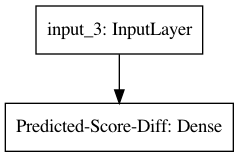

In [15]:
input_tensor = Input(shape=(1,))
output_layer = Dense(1, name = 'Predicted-Score-Diff')
output_tensor = output_layer(input_tensor)
model = Model(input_tensor, output_tensor)
plot_model(model, to_file = 'model.png')

* ** `plot_model`** saves the image to a file, which we can then display using matplotlib's `imread()` and `imshow()` functions as shown above.

### Fit and evaluate a model 
* In this lesson, we'll take the model compiled in the previous lesson and fit it to college basketball data
* Goal: predict which team will win a tournament game
* Data available: team ratings from the tournament organizers
* input: `seed_diff`
* output: `score_diff`
* Because this model has one input and one output, it is exactly the simple model we created in the last lesson
* Seed differences will range from -15 to 15
* A positive seed difference is usually predictive of a negative score
* A negative seed difference is usually predictive of a positive score difference
* Our target variable is the game's score difference and ranges from about -50 to positive 50
    * This means there are games where team 1 lost by 50 points, as well as games where team 1 won by 50 points
* **Note** that both the regular season and the tournament datasets have 2 rows per game, where the second row has the opposite signs of the first row (team 1 of row 1 = team 2 of row 2 and team 2 of row 1 = team 1 of row 2).
* You could use the simple model built above for **any regression problem with a single predictor and a single outcome**

#### Fit the model 

In [25]:
games = pd.read_csv('data/games_tourney.csv')
model.compile(optimizer='adam', loss='mae')
model.fit(games['seed_diff'],
          games['score_diff'],
          batch_size=64,
          validation_split = 0.2,
          verbose=True)

2022-01-19 16:32:13.078141: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


53/53 [==============================] - 0s 3ms/step - loss: 17.9076 - val_loss: 16.5687


* Once you've fit a model, it's useful to evaluate it on new data

# $\star$ Chapter 2: Two Input Networks Using Categorical Embeddings, Shared Layers, and Merge Layers
In this chapter, you will build two-input networks that use categorical embeddings to represent high-cardinality data, shared layers to specify re-usable building blocks, and merge layers to join multiple inputs to a single output. By the end of this chapter, you will have the foundational building blocks for designing neural networks with complex data flows.

### Category embeddings
* The dataset of the regular season is *much* larger than the tournament dataset.
* In the 2 basketball datasets we use in this course there are just under 11,000 teams.
* Each team is encoded as an integer starting with 1 and ending with 10,887.
* In this lesson, we'll learn how to use the team IDs as inputs to a model that learns the strength of each team.
* **Categorical embeddings** are an advanced type of layer only available in deep learning libraries.
    * Input: integers
    * Output: floats
    * **Note: Increased dimensionality: output layer (lookup table) flattens back to 2D**
    * They are extremely useful for dealing with high cardinality categorical data
    * **Embedding layers** are also very useful for dealing with text data (such as in Word2vec models)
    
    
```
input_tensor = Input(shape=(1,))
n_teams = 10887
embed_layer = Embedding(input_dim=n_teams,
                        input_length=1
                        output_dim=1,
                        name='Team-Strength-Lookup')
embed_tensor = embed_layer(input_tensor)                        
```

* Since there are 10,887 unique teams in the dataset, the input dimension of the embedding layer is 10,887
* As you are representing each team as a single integer, use an input length of 1
* Likewise, because we want to produce a single team strength rating, the output dimension (`output_dim` will be `1`).
* **To use the embedding layer, connect it to the tensor produce by the input layer**
    * This will produce an embedding output tensor
* **Embedding layers increase the dimensionality of your data**
    * The input CSV has two dimensions: rows and columns
    * Embedding adds a third dimension
    * This third dimension can be useful when dealing with images and text, but is not relevant in this course
    * Therefore, we use the `Flatten` layer to flatten the embeddings from 3D to 2D
    * The `Flatten` layer is also the output layer for the embedding process
    
#### Flattening    
* We use the `Flatten` layer to flatten the embeddings from 3D to 2D
* The `Flatten` layer is also the output layer for the embedding process   
* `Flatten` layers are an advanced layer for deep learning models and can be used to transform data from multiple dimensions back down to two dimensions
* They are useful for dealing with time series data, text data, and images. 
   
```
from keras.layers import Flatten
flatten_tensor = Flatten()(embed_tensor)
```

### Putting it all together
* You can wrap your `Embedding` layer in a model; this will allow you to reuse the model for multiple inputs in the dataset
* You do this by defining an input later, then a flatten layer for the output
* Finally, wrap the input tensor and flatten tensor in a model.
* **This model can be treated exactly the same as a layer, and can be re-used inside of another model.**

```
input_tensor = Input(shape=(1,))
n_teams = 10887
embed_layer = Embedding(input_dim=n_teams,
                        input_length=1,
                        output_dim=1,
                        name='Team-Strength-Lookup')
embed_tensor = embed_layer(input_tensor)
flatten_tensor = Flatten()(embed_tensor)
model = Model(input_tensor, flatten_tensor)
```

#### Exercises: Define team lookup 

```
# Imports
from keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')
                        
# Imports
from keras.layers import Input, Embedding, Flatten
from keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')                   
```                        

### Shared Layers
* In this chapter we will create a model with two inputs: one for each team in the basketball dataset
* However, you want these two teams to each use the same embedding layer defined in the previous lesson
* Accomplishing this requires a **shared layer**
* A **shared layer:**
    * Requires the funcitonal API
    * Very flexible 
    
<img src='data/shared_layer.png' width="600" height="300" align="center"/>    

* **Shared layers** are an advanced deep learning concept, and are only possible with the Keras functional API
* **They allow you to define an operation and then apply the exact same operation (with the exact same weights) on different inputs.**
* In this model, we will shared team rating for both inputs 
* The learned rating will be the same, whether it applies to team 1 or team 2
* To **create a shared layer**, you must first create two (or more) inputs, each of which will be passed to the shared layer.

```
input_tensor_1 = Input((1,))
input_tensor_2 = Input((1,))
```

<img src='data/shared_layer2.png' width="600" height="300" align="center"/>

* Once you have two inputs, the magic of the Keras function API becomes apparent
* Recall that the `Dense()` function returns a function as its output
* This function (which `Dense` outputs) **takes a tensor as input** and **produces a tensor as output**
* This same `Dense` function can be used to create a shared layer
* Doing so is as simple as calling the function twice, with a different input tensor each time.


```
shared_layer = Dense(1)
output_tensor_1 = shared_layer(input_tensor_1)
output_tensor_2 = shared_layer(input_tensor_2)
```

<img src='data/shared_layer3.png' width="600" height="300" align="center"/>

### Sharing multiple layers as a model
* Recall the category embedding model we made in the previous lesson which first embed an input and then flattens it.
* **You can also share models, not just layers.**
    * This is part of what makes the functional API so usefu
    * $\star$ **You can define modular components of models and then reuse them!** $\star$

<img src='data/shared_layers_code.png' width="600" height="300" align="center"/>
    


* After defining an Embedding layer and wrapping it in a model, we define 2 input tensors and pass each to the same model, producing 2 output tensors
* This will use the same model, with the same layers and the same weights, for mapping each input to its corresponding output
* In other words, you can take an arbitrary sequence of keras layers, and wrap them up in a model

<img src='data/shared_layer4.png' width="600" height="300" align="center"/>

* Once you have a model, you can re-use thT model to share that sequece of steps for different input layers

### Merge layers
* Now that we've got multiple inputs and a shared layer, **we'll need to combine inputs into a single layer that we can use to predict a single output**; this requires a **merge layer.**
* **Merge layers** allow you to define advanced, *non-sequential* network topologies.
    * This can give you a lot of flexibility to creatively design networks to solve very specific problems
* There are many kinds of merge layers available in Keras
* Merge layers for simple arithmetic operations:
    * Add
    * Subtract
    * Multiply
    * Concatenate
* **These merge layers do simple arithmetic operations *by element* on the input layers** and require them to be the same shape
* Concatenate similar to `np.hstack()` or `pd.concat()`
    * Unlike the other merge layers, the `Concatenate` layer can operate on layers with different numbers of columns (and rows)
    
    
    
* Let's build a simple Keras model that takes in two numbers and adds them together:

```
from keras.layers import Input, Add
in_tensor_1 = Input((1,))
in_tensor_2 = Input((1,))
out_tensor = Add()([in_tensor_1, in_tensor_2])
```

<img src='data/add_layer.png' width="400" height="200" align="center"/>

* If you'd like to add together many inputs, you can pass a list with more than two elements to an `Add` layer:

```
in_tensor_3 = Input((1,))
out_tensor = Add()([in_tensor_1, in_tensor_2, in_tensor_3])
```
* **Note** that all of the inputs are required to have the same shape, so they can be combined element-wise.

#### Create the model
* Now you can wrap the output from your `Add` layer inside a `Model`, which will then allow you to fit it to data

```
model = Model([in_tensor_1, in_tensor_2], out_tensor)
```
* **Note** that above the model takes in a list of inputs because it has more than one input

### Fitting and Predicting with multiple inputs 
* Keras models with multiple inputs work just like Keras model with a single input; they use the same `fit`, `predict`, and `evaluate` methods
* The only difference is that all of these methods take a list of inputs, rather than a single input.

```
model.fit([data_1, data_2], target)
```
* **While this network is very simple, the concept it illustrates is quite advanced.**
* Later in the course you will process different inputs to the network in different ways.
* In other words, multiple inputs let you data pre-processing as part of the model you learn.

#### Predict with multiple inputs
* **To make predictions from a model with two inputs, you also need to provide two inputs to the model's `predict()` method, once again as a list.**

```
model.predict([np.array([[1]]), np.array([[2]])])
array([[3.]], dtype=float32)

model.predict([np.array([[42]]), np.array([[199]])])
array([[161.]], dtype=float32)
```

#### Evaluate with multiple inputs
* To evaluate a model with multiple inputs, simply give it a list of inputs, along with a single output, and the model will return its loss on the new data

```
model.evaluate([np.array(-1]]), np.array([[-2]])], np.array([[-3]]))
```

# $\star$ Chapter 3: Multiple Inputs: 3 Inputs (and Beyond!)
In this chapter, you will extend your 2-input model to 3 inputs, and learn how to use Keras' summary and plot functions to understand the parameters and topology of your neural networks. By the end of the chapter, you will understand how to extend a 2-input model to 3 inputs and beyond.

### Three-input models
* This demonstrates the power of the Keras functional API
* Once you have learned how to work with two input networks, it is trivial to extend that knowledge to 3 or more input networks 
* Making a keras model with 3 inputs is almost exactly the same as making a Keras model with two inputs. 

<img src='data/3_inputs.png' width="400" height="200" align="center"/>

```
from keras.layers import Input, Concatenate, Dense
in_tensor_1 = Input(shape=(1,))
in_tensor_2 = Input(shape=(1,))
in_tensor_3 = Input(shape=(1,))
out_tensor = Concatenate()([in_tensor_1, in_tensor_2, in_tensor_3])
output_tensor = Dense(1)(out_tensor)
```
* In this model, we use a `Concatenate()` layer to combine the inputs, but we could also have used a `Subtract()`, `Add()`, or `Multiply()` (etc) layer.
* Finally, add a Dense layer to reduce the three inputs to a single output
* In the exercises for this chapter, we will also practice using a shared layer in a model with more than 2 inputs

```
shared_layer = Dense(1)
shared_tensor_1 = shared_layer()(in_tensor_1)
shared_tensor_2 = shared_layer()(in_tensor_1)
out_tensor = Concatenate()([shared_tensor_1, shared_tensor_2, in_tensor_3])
out_tensor = Dense(1)(out_tensor)
model = Model([in_tensor_1, in_tensor_2, in_tensor_3], out_tensor)
```
* For example (as shown above), you can pass the first two inputs to a shared layer and then concatenate the result of that shared layer with the third input
* Compile, fit and evaluate:

```
model.compile(loss='mae', optimizer='adam')

model.fit([[train['col1'], train['col2'], train['col3']], train_data['target'])

model.evaluate([[test['col1'], test['col2'], test['col3'], test['target'])

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
```

### Summarizing and plotting models
* **Importantly, Keras models can have non-trainable parameters that are fixed and do not change, as well as trainable parameters, that are learned from the data when the model is fit.**
* Models with more trainable parameters are typically more flexible 
    * **This can also make them more prone to overfitting**
* Models with fewer trainable parameters are less flexible, but therefore less likely to overfit. 
* **A model's trainable parameters are usually in its `Dense` layers.**

#### Understanding a model summary
* Here is the summary of a slightly more complicated model 

<img src='data/understanding_modsum.png' width="600" height="300" align="center"/>

* You can see that this model has an `Embedding` layer.
* Even though the `Dense` layer still only has 4 parameters, the model has many more trainable parameters because of the embedding layer
* **It's important to remember that embedding layers often add a very large number of trainable parameters to a model**
    * Recall that **embedding layers map integers to floats**: *each unique value of the embedding input gets a parameter for its output.*
* Here is a plot of a slightly more complicated model:
    
<img src='data/plot_mod2.png' width="400" height="200" align="center"/>

* Note that output layers have arrows coming in, but no arrows going out 
* Intermediary layers: have arrows going in and coming out
* This model has a shared model: the team strength model, which is applied to two of the inputs before they are combined in the concatenate layer with the third input 
* Input layers only have one arrow going out (none coming in)
* Here's another way of looking at the same model:

<img src='data/plot_mod3.png' width="400" height="200" align="center"/>

* Shared models work exactly the same as shared layers
* This is a useful abstraction because **you can put together a sequence of layers to define a custom model, and then share the entire model in exactly the same way you'd share a layer.**

## Stacking models
* **Model stacking:** using the predictions from one model as an input to another model
* Model stacking is a very advanced data science concept; it is the most sophisticated way of combining models, and when done right can yielf some of the most accurate models in existence.
* Model stacking is often employed to win popular predictice modeling competitions
* In this course so far, we've been working with 2 datasets: the college basketball data from the regular season and the college basketball data from the post-season tournament

#### Stacking models requires 2 datasets
* In this course so far, we've been working with 2 datasets: the college basketball data from the regular season and the college basketball data from the post-season tournament
* Both datasets contain the two teams playing, whether team 1 is home or away, and the score difference of the games
* The tournament dataset additionally contains the difference in seeds of the two teams playing

#### Enrivh the tournament data
* There's a lot more data on regular season games than there is on tournament games
* The regular season dataset has over 300,000 rows, but the tournament dataset only has about 4,000 rows (which is pretty small)
* Recall also that our embedding layer has about 11,000 inputs
* 4,000 rows of data is not enough to learn all 11,000 parameters in our embedding layer
* In the previous lesson, we build a three-input model on the regular season data
* Now let's reuse this model to add predictions from the regular season model to the tournament dataset
* This diagram shows the process for stacking these two models

<img src='data/stack_mod_flow2.png' width="400" height="200" align="center"/>

* The prediction from the regular season model captures the effects of `team_1` and `team_2`, which that you now don't need to use those two variables in the tournament model and can avoid the use of an embedding layer; now you can focus your modeling efforts on the purely numeric data, which is a little easier to work with.
* With purely numeric inputs, you can pass all of them to a single input layer
* In other words, an input layer with a shape of 3 is another way of defining a 3 input model
    * The only drawback of this approach is that **all the inputs must be numeric**
* **A huge advantage of this approach is simplicity.**
    * You can create a model with a single input tensor and an output tensor, and fir it using a single dataset
    * Similarly, evaluating the model requires a single dataset, rather than a list
    
```
in_tensor = Input(shape=(3,))
out_tensor = Dense(1)(in_tensor)

model = Model(in_tensor, out_tensor)
model.compile(optimizer='adam', loss='mae')
train_X = train_data[['home','seed_diff','pred']]
train_y = train_data['score_diff']
model.fit(train_X, train_y, epochs=10, validation_split=0.10)

test_X = test_data[['home', 'seed_diff', 'pred']]
test_y = test_data['score_diff']
model.evaluate(test_X, test_y)
```
* `9.1132`
* The model is pretty accurate. It's off, on average, by about 9 points in a given game
* To recap: **stacking keras models means using the predictions from one model as an input to a second model.**
    * **When stacking, it's important to use different datasets for each model.**
    * **If your input dataset is purely numeric, you can put multiple inputs in a single input layer.**

# $\star$ Chapter 4: Multiple Outputs
In this chapter, you will build neural networks with multiple outputs, which can be used to solve regression problems with multiple targets. You will also build a model that solves a regression problem and a classification problem simultaneously.

### Two-output models
* In this chapter we'll cover neural networks with 2 outputs
    * These networks make predictions for 2 targets at once
    * For example, you could use a single model to predict the scores of both teams in a basketball game or use a single model to predict both the score difference and the win/loss outcome of that game
    
### Simple model with 2 outputs 
* We start with an input layer
* To make a 2-output model, we simply make a Dense layer with 2 units for the output. The model will now make 2 predictions.
* The API for creating a 2-output model and compiling it is exactly the same as for a single model output
    * Wrap the input and output tensors in your call to Model()
    * Then compile with appropriate parameters
* **To fit a model with 2 outputs, you use a dataset with 2 columns for the y variable.**
* In this case, the training set has the seed difference for the two teams, as well as the teams scores for the game
* The model's single input is seed difference, and the 2 outputs are the scores for each team

```
input_tensor = Input(shape=(1,))
output_tensor = Dense(2)(input_tensor)

model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mean_absolute_error')

games_tourney_train[['seed_diff', 'score_1', 'score_2']].head()

X = games_tourney_train[['seed_diff']]
y = games_tourney_train[['score_1', 'score_2']]

model.fit(X, y, epochs=500)
```
* The `fit` call is exactly the same as a single input, single output model, the only difference is that the y variable has 2 columns.
* This particular model takes awhile to converge, so we use 500 epochs in the fit.

#### Inspecting a 2 output model
* Now that the model is fit, you can take a look at what it learned 
* The dense layer has two weights and two biases

```
model.get_weights()
```

<img src='data/get_weights.png' width="400" height="200" align="center"/>

* The weights indicate that each additional unit of seed difference for the input data equals about 60 additional points for team 1 (and 60 fewer points for team 2)
* The bias, or intercept term for each team is about 70 points, indicating that we expect an average basketball team to score about 70 points in an average game
* In other words, 2 teams with a 1 point seed difference would be expected to have a score of about 69-71, while 2 teams with a 10 point difference would be expected to have a score of about 64 to 76

#### Evaluating a model with 2 outputs
* Evaluating a model with two outputs is very similar to evaluating a model with 1 output, except you provide the evaluation function a dataset with 2 columns of data for the target

In [26]:
# Define the input
input_tensor = Input((2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss = 'mean_absolute_error')

```
# Fit the model
model.fit(games_tourney_train[['seed_diff', 'pred']],
  		  games_tourney_train[['score_1', 'score_2']],
  		  verbose=True,
  		  epochs=100,
  		  batch_size=16384)
```

## Single model for classification and regression
* Here we will demonstrate how to build a simple model that performs *both* classification *and* regression.

#### Build a simple regressor/classifier
* This is another example of a model with two outputs
* In this case, however, rather than using two regression outputs, we'll have a regression output and a classification output
* For the classification part of the model, we use the regression model prediction as input and then add another Dense output layer on top of it using the sigmoid activation, which will map the predicted score differences to probabilities that team 1 wins or loses
* With two output models, each output needs its own loss function:
    * For this model, we've specified two different loss functions: 1 for the regression model and 1 for the classification model 
* To fit the combination classification/regression model, you must provide the $y$ data as a list

<img src='data/reg_class_flow.png' width="600" height="300" align="center"/>

```
input_tensor = Input(shape=(1,))
output_tensor_reg = Dense(1)(input_tensor)
output_tensor_class = Dense(1, activation='sigmoid')(output_tensor_reg)

model = Model(input_tensor, [output_tensor_reg, output_tensor_class])
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer='adam')

X = games_tourney_train[['seed_diff']]
y_reg = games_tourney_train[['score_diff']]
y_class = games_tourney_train[['won']]
model.fit(X, [y_reg, y_class], epochs=100)

model.get_weights()
```
* This model's weight structure will be a bit different from the last model, where both outputs were regression targets
* The first layer has a weight of 1.24 and a bias of almost 0
    * This means that a 1 unit change in the teams' seed difference yields about 1.24 additional points in their score difference
    * So, two teams with a seed difference of 1 would be expected to have team 1 win by 1
    * But, 2 teams with a seed difference of 10 would be expected to have team 1 win by 12 points
* The next layer maps predicted score difference to predicted win/loss.
* Recall that the final layer in the model uses sigmoid activation
* You can manually calculate the final layer in the model (using the weights we obtained with the `model.get_weights()` call above:
    
```
from scipy.special import expit as sigmoid
print(sigmoid(1 * 0.13870609 + 0.00734114)
```

#### Evaluate the model on new data 
* First, split the evaluation dataset into a regression target and a classification target, and provide the same list of two targets to the `evaluate` method
* This outputs 3 numbers now, instead of 1

```
X = games_tourney_test[['seed_diff']]
y_reg = games_tourney_test[['score_diff']]
y_class = games_tourney_test[['won']]
model.evaluate(X, [y_reg, y_class])
```
* **The first number is the loss function** used by the model, which is the sum of all the output losses
* **The second numbe is the loss for the regression** part of the model
* **The third number is the loss for the classification** part of the model 


* So, our model has a MAE of 9.28 and a logloss of 0.58

```
# Create an input layer with 2 columns
input_tensor = Input((2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])
```